In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

EDA

In [4]:
train = pd.read_csv('mnist_train.csv')
print(train.head())
print(train.info())
print("\n Shape of the dataset:", train.shape)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None

In [5]:
#NaN values in the dataset ?
nan = train.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


=> No missing values

In [12]:
#Displays 4 handwritten digit images
def display_digits(N):
    """Picks-up randomly N images within the 
    train dataset between 0 and 59999 and displays the images
    with 4 images/row"""
    
    train = pd.read_csv('mnist_train.csv')
    images = np.random.randint(low=0, high=59999, size=N).tolist()
    
    subset_images = train.iloc[images,:]
    subset_images.index = range(1, N+1)
    print("Handwritten picked-up digits: ", subset_images['label'].values)
    subset_images.drop(columns=['label'], inplace=True)

    for i, row in subset_images.iterrows():
        plt.subplot((N//8)+1, 8, i)
        pixels = row.values.reshape((28,28))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.title('Randomly picked-up images from the training dataset')
    plt.show()

    return ""

Handwritten picked-up digits:  [5 2 6 3 2 2 6 7 3 2 7 2 9 8 1 8 0 9 1 2 7 0 2 6 8 4 2 2 3 7 4 1 8 9 4 6 1
 1 0 9]


C:\Users\HP\AppData\Local\Temp\ipykernel_4756\3537608943.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_images.drop(columns=['label'], inplace=True)


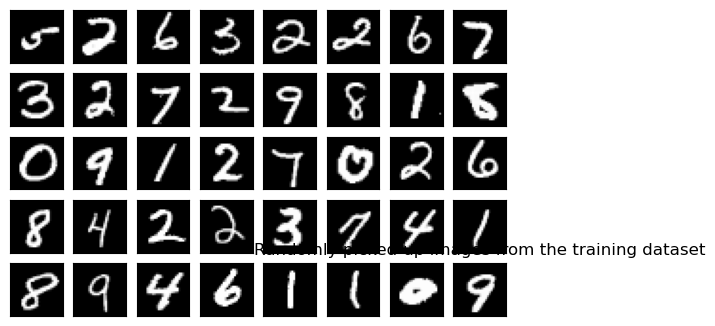

''

In [13]:
display_digits(40)

In [14]:
subset_pixels = train.iloc[:, 1:]
subset_pixels.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


ta có thể nhận thấy nhiều pixel luôn nhận giá trị 0 hoặc 255

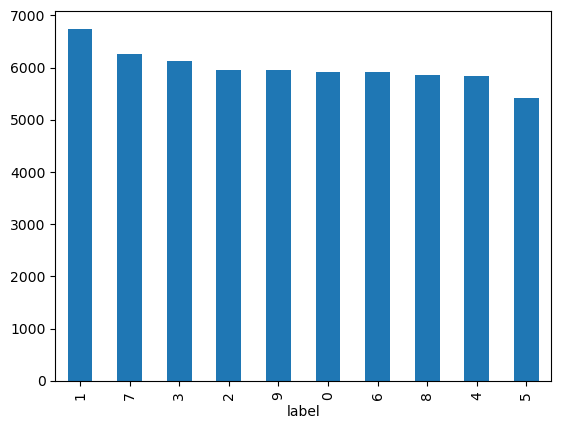

In [15]:
#Distribution of the digits in the dataset
_ = train['label'].value_counts().plot(kind='bar')
plt.show()

In [16]:
from sklearn.decomposition import PCA

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


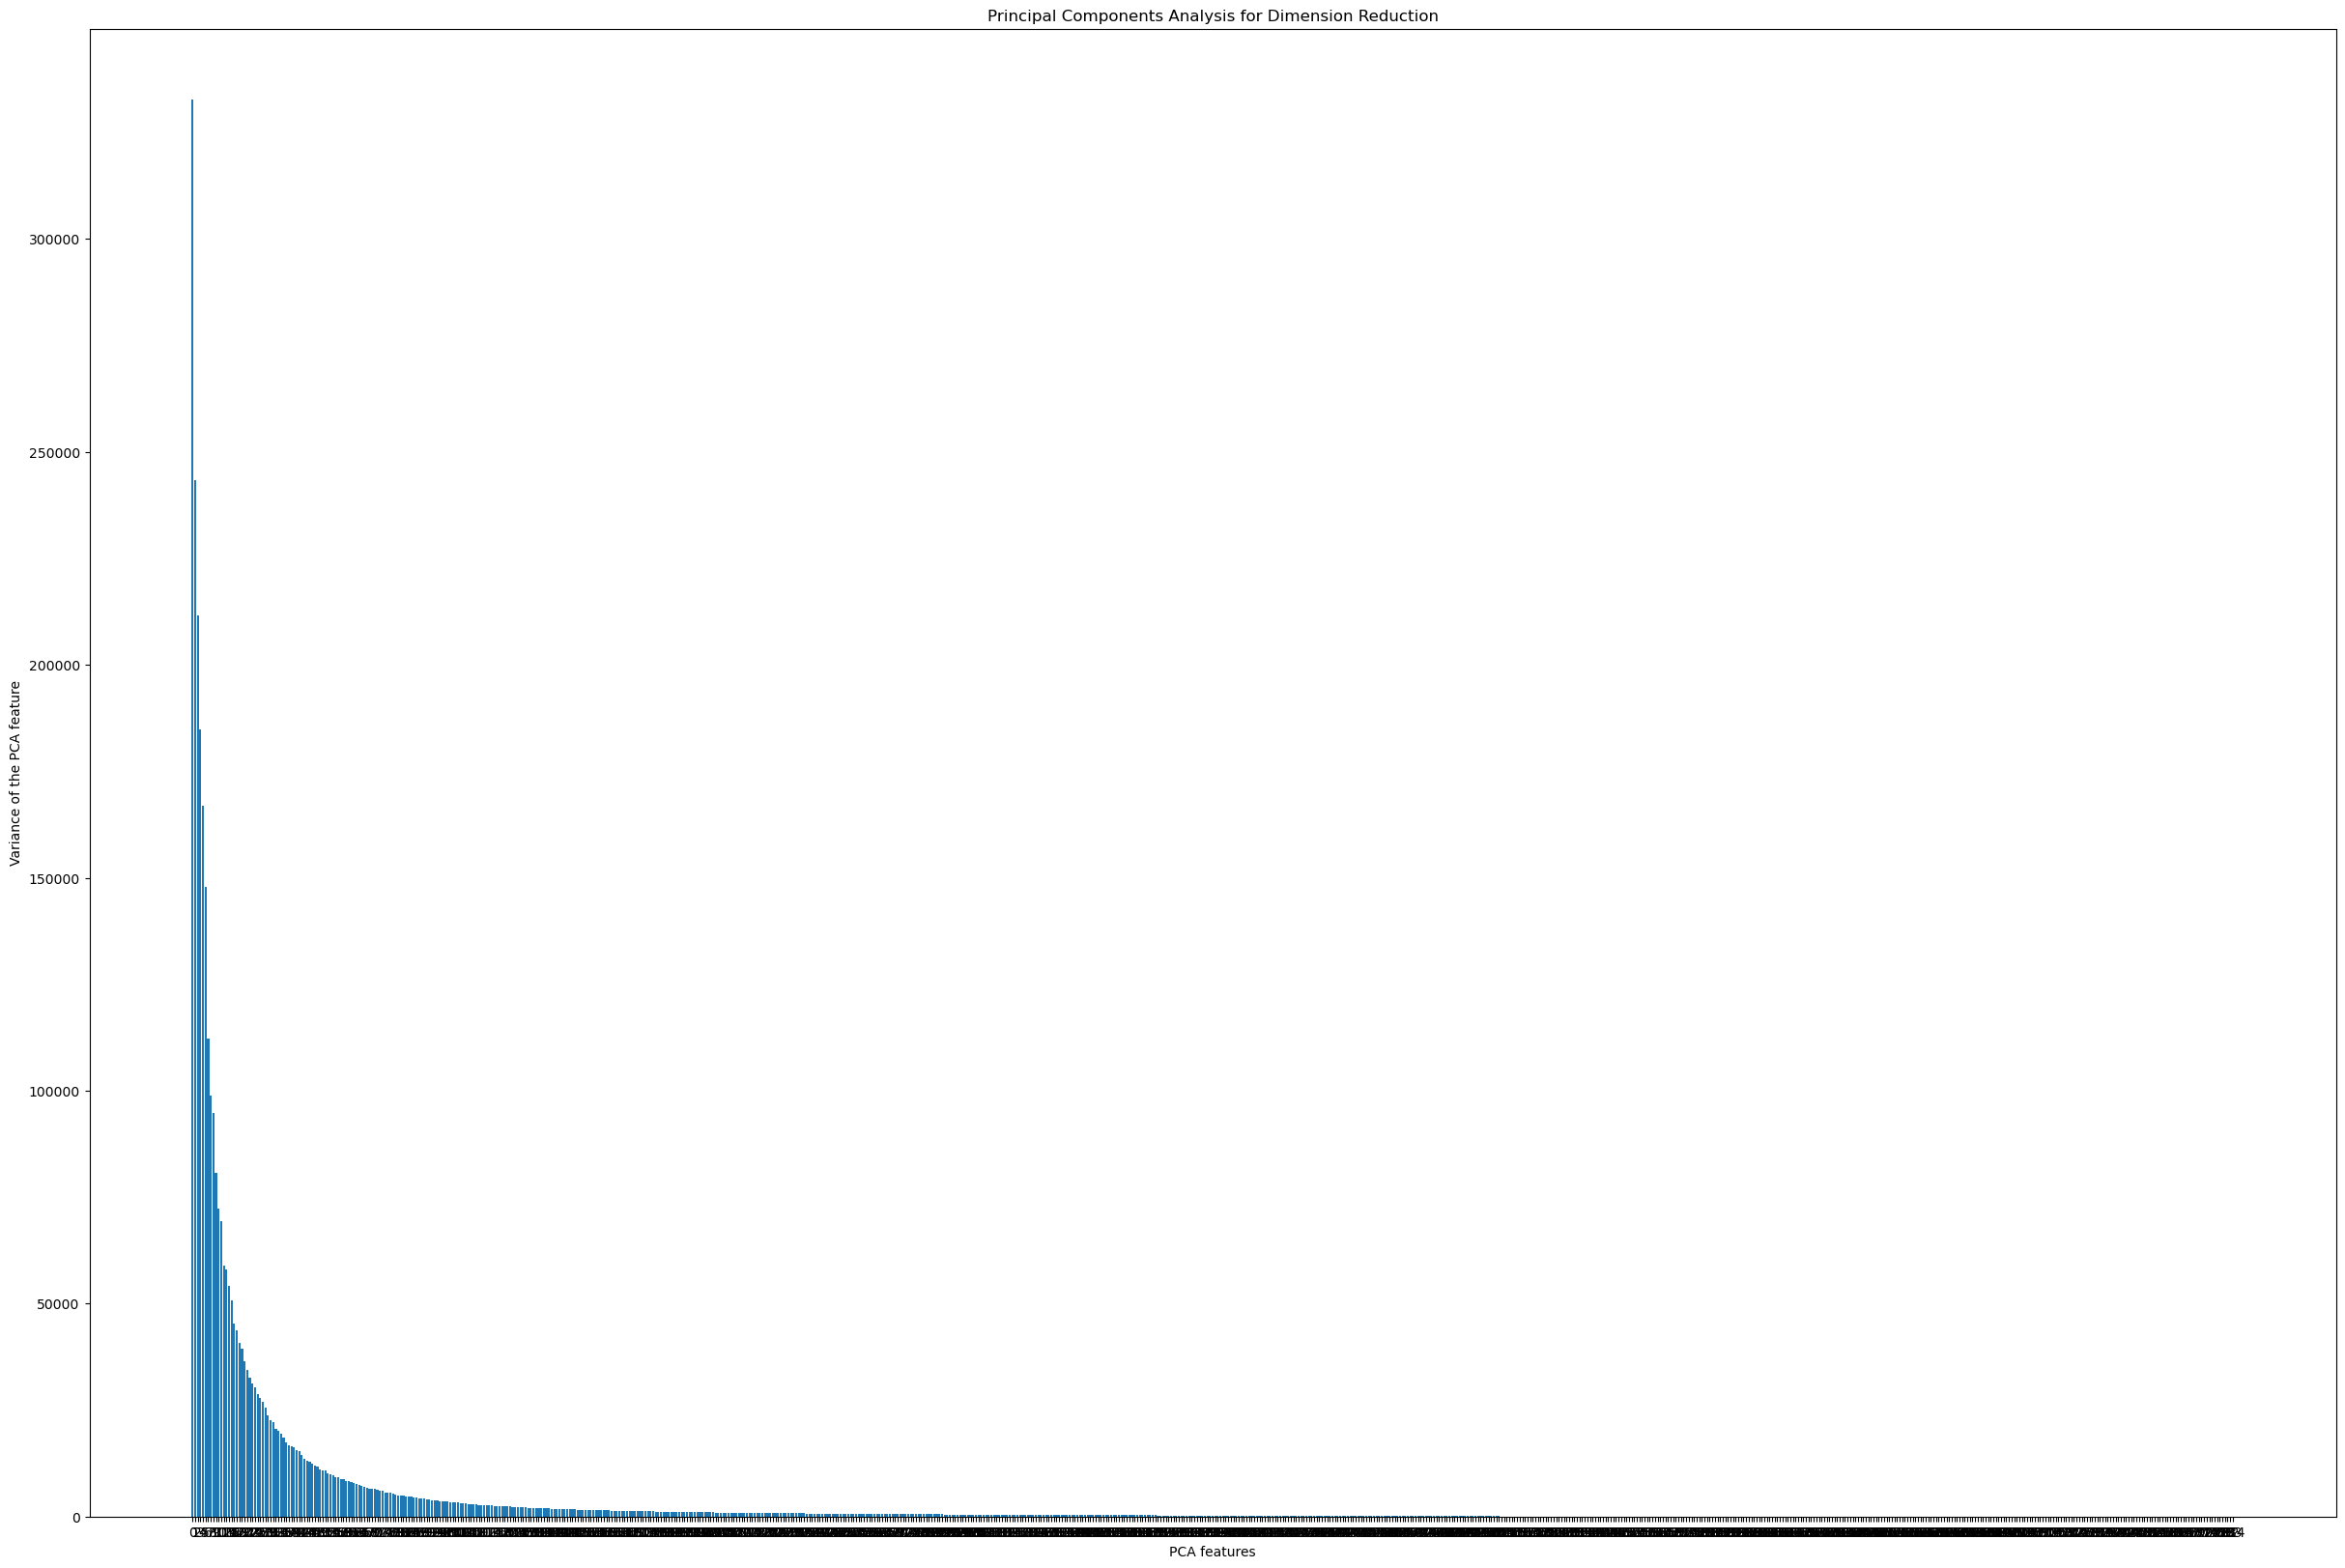

FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/PCA features variance_zoom.png'

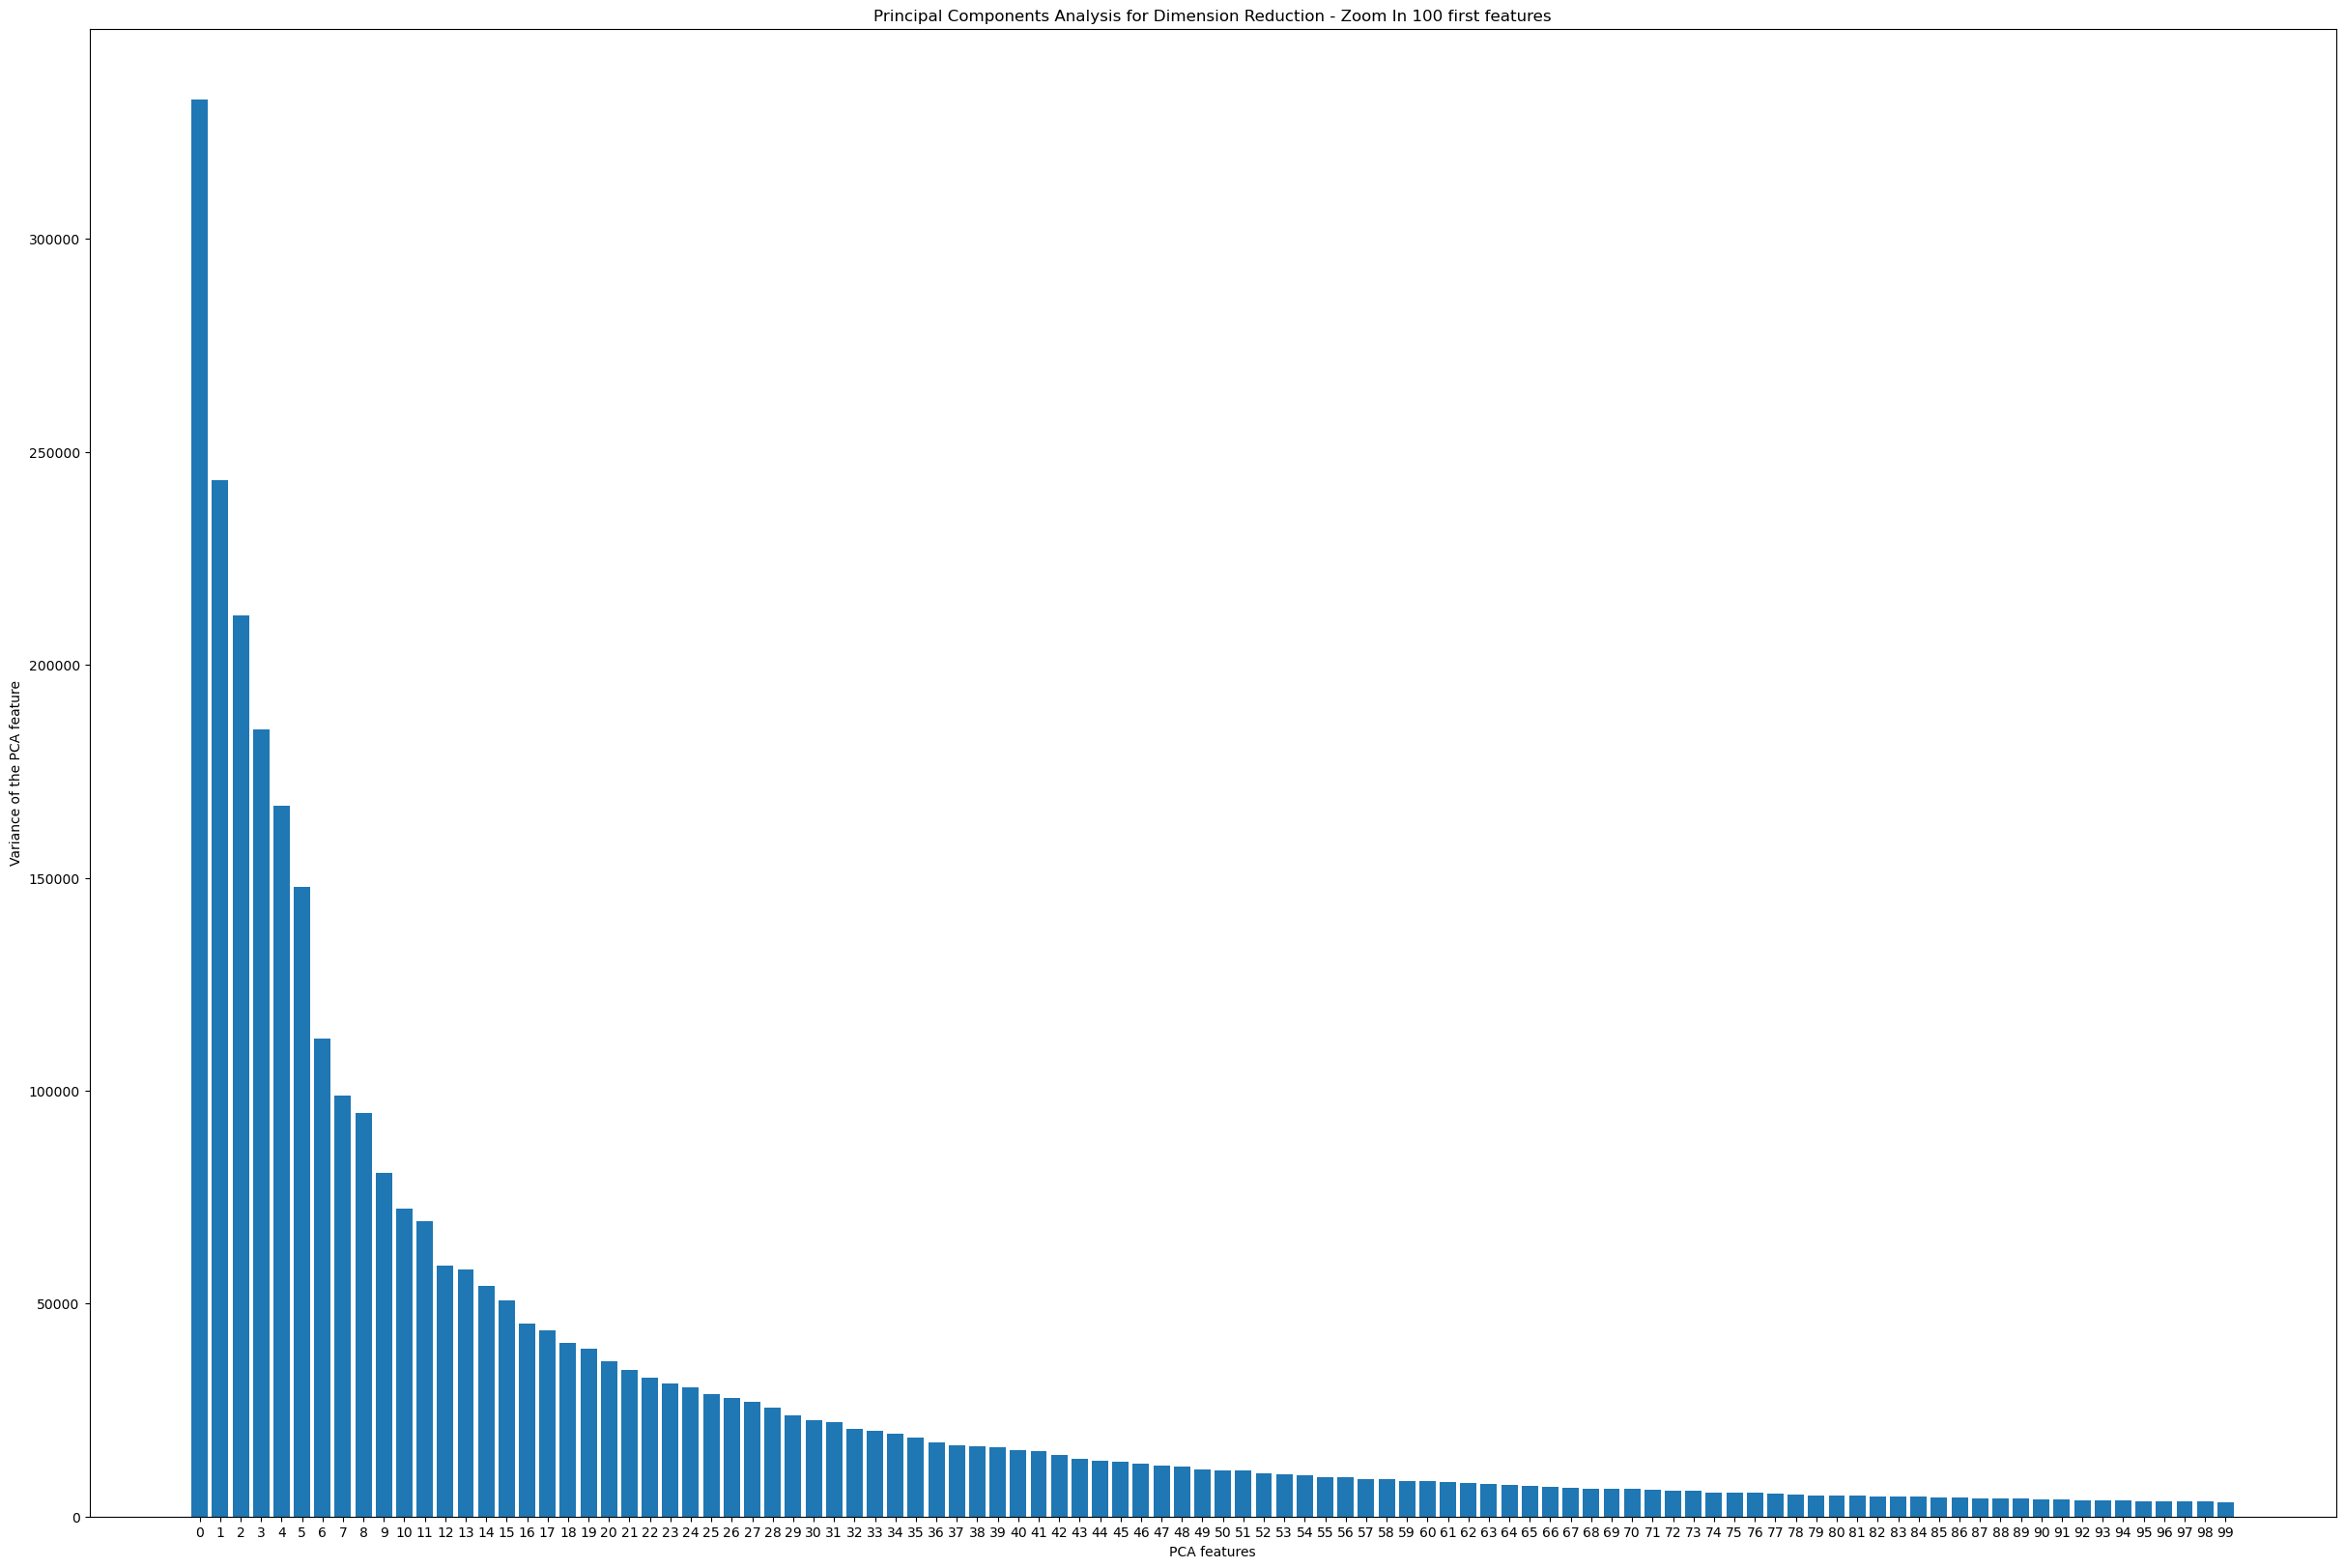

In [19]:
pca = PCA()
pca.fit(train)

#PCA features variance visualization
pca_features = range(pca.n_components_)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(pca_features, pca.explained_variance_)
_ = plt.xticks(pca_features)
_ = plt.title('Principal Components Analysis for Dimension Reduction')
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
#_ = plt.savefig('visualizations/PCA features variance.png')
plt.show()

#PCA features variance visualization - ZOOM in
l= 100
x = range(l)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(x, pca.explained_variance_[:l])
_ = plt.xticks(x)
_ = plt.title('Principal Components Analysis for Dimension Reduction - Zoom In {} first features'.format(l))
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
_ = plt.savefig('visualizations/PCA features variance_zoom.png')
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

[0.09704646 0.16800612 0.22969687 0.283591   0.3322791  0.37540132
 0.48814946 0.73053575 0.85259765 0.89029644 0.91431888 0.96603426
 0.99576831 0.99999996]


FileNotFoundError: [Errno 2] No such file or directory: 'visualizations/cumulated variance_pca features.png'

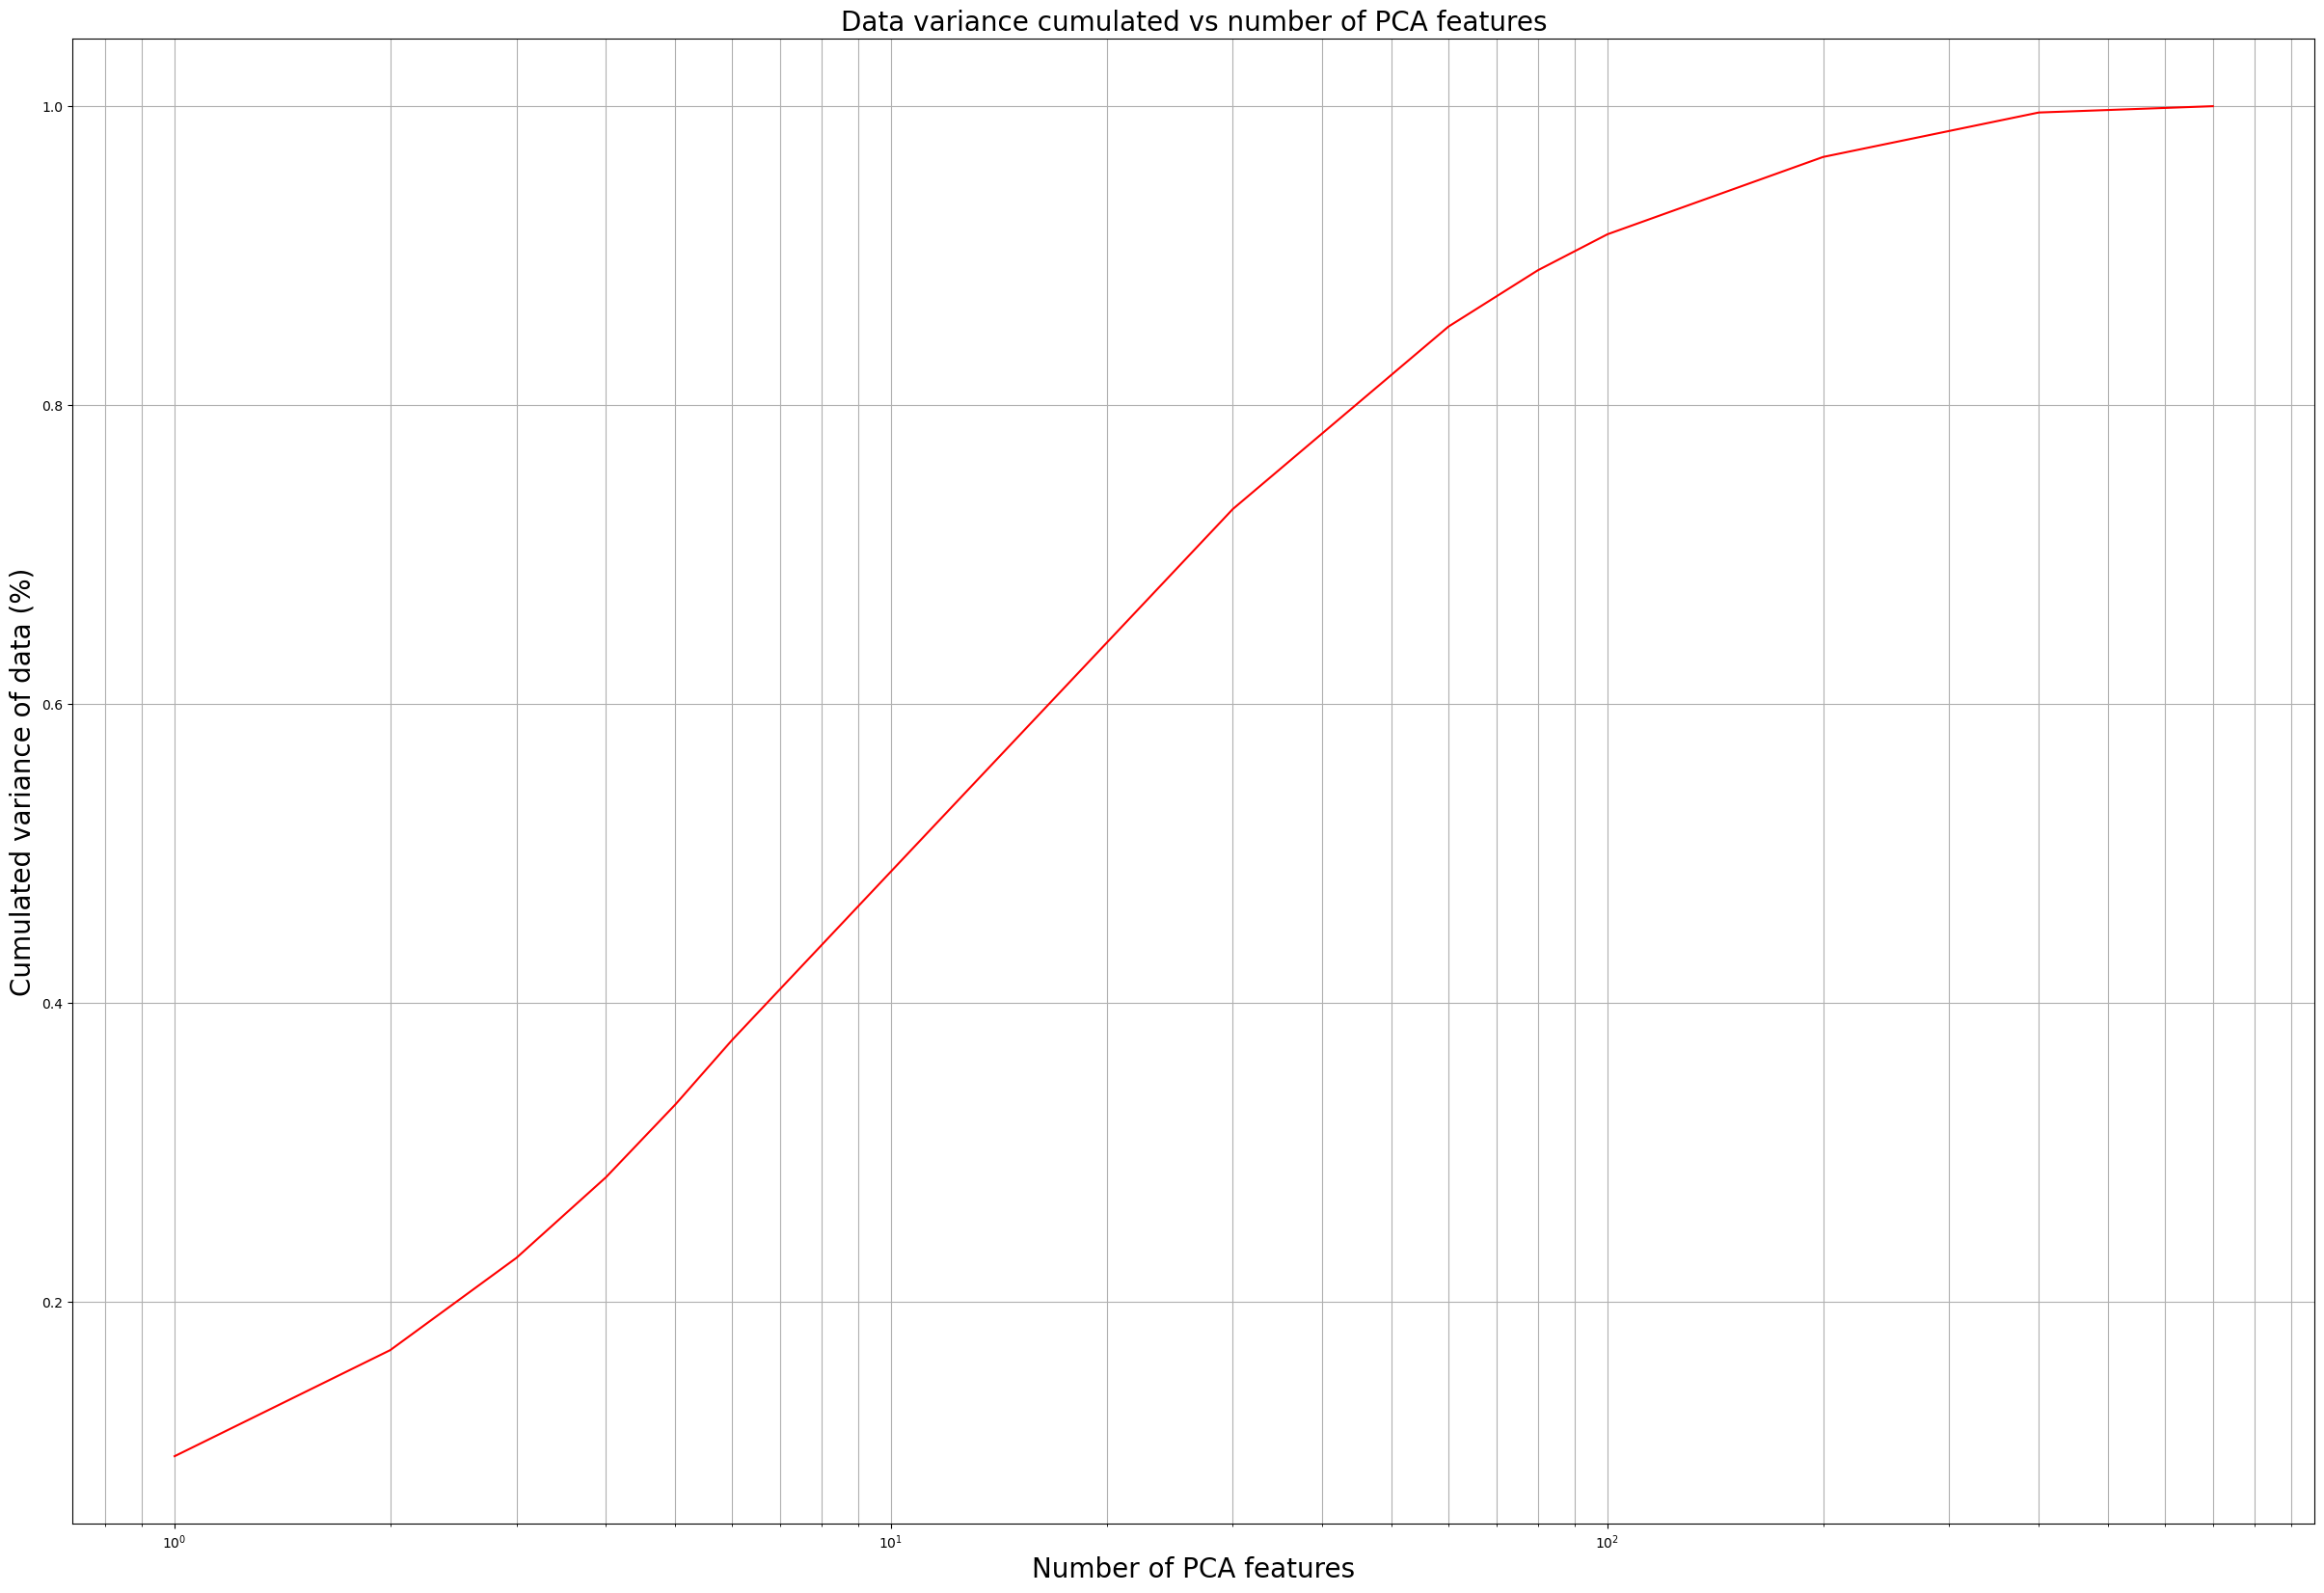

In [21]:
n_components = np.array([1,2,3,4,5,6, 10, 30, 60, 80, 100, 200, 400, 700])
cumul_variance = np.empty(len(n_components))
for i, n in enumerate(n_components):
    pca = PCA(n_components=n)
    pca.fit(train)
    cumul_variance[i] = np.sum(pca.explained_variance_ratio_)

print(cumul_variance)

_ = plt.figure(figsize=(30,20))
_ = plt.grid(which='both')
_ = plt.plot(n_components, cumul_variance, color='red')
_ = plt.xscale('log')
_ = plt.xlabel('Number of PCA features', size=20)
_ = plt.ylabel('Cumulated variance of data (%)', size=20)
_ = plt.title('Data variance cumulated vs number of PCA features', size=20)
plt.savefig('visualizations/cumulated variance_pca features.png')
plt.show()